# NAIVE BAYES CLASSIFIER

## Understand the data

## Implement the model using Python

#### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

%matplotlib inline

#### Load Dataset

In [3]:
df=pd.read_csv('stroke.csv')
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669.0,Male,3,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,30468.0,Male,58,1,0,Yes,Private,Urban,255.00,39.2,never smoked,1
2,56543.0,Female,70,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
3,NaN,Female,52,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
4,41413.0,Female,75,0,1,Yes,Self-employed,Rural,103.00,27.0,never smoked,0


#### NO OF Rows and Columns in the data

In [4]:
df.shape

(29073, 12)

#### Summary of the data

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,29072.000000,29073.000000,29073.000000,29073.000000,29073.000000,29073.000000,29073.000000
mean,37078.708207,47.670209,0.111478,0.129433,115.907356,29.585285,0.171706
std,20965.260350,18.736000,0.314729,0.335684,56.764586,8.356899,0.377131
min,1.000000,3.000000,0.000000,0.000000,55.010000,0.000000,0.000000
25%,19046.750000,32.000000,0.000000,0.000000,80.360000,25.000000,0.000000
50%,37441.500000,48.000000,0.000000,0.000000,98.500000,28.900000,0.000000
75%,55220.250000,62.000000,0.000000,0.000000,118.000000,33.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,281.590000,92.000000,1.000000


#### check to if DATA is in which Form Numeric or Categorical?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29073 entries, 0 to 29072
Data columns (total 12 columns):
id                   29072 non-null float64
gender               29073 non-null object
age                  29073 non-null int64
hypertension         29073 non-null int64
heart_disease        29073 non-null int64
ever_married         29073 non-null object
work_type            29073 non-null object
Residence_type       29073 non-null object
avg_glucose_level    29073 non-null float64
bmi                  29073 non-null float64
smoking_status       29073 non-null object
stroke               29073 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 2.7+ MB


#### Check if any Null values?

In [7]:
df.isnull().sum()

id                   1
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### NO Null Values in the data

In [8]:
df = df.drop(['id'], axis=1)

In [9]:
df['stroke'].value_counts(normalize = True)

0    0.828294
1    0.171706
Name: stroke, dtype: float64

#### Grouping Based On Outcome

In [10]:
#Group numerical variables by mean
df.groupby("stroke").mean()

,age,hypertension,heart_disease,avg_glucose_level,bmi
stroke,,,,,
0,46.693700,0.057016,0.044143,92.442372,29.904124
1,52.380809,0.374199,0.540865,229.100519,28.047236


### Histogram on the Data

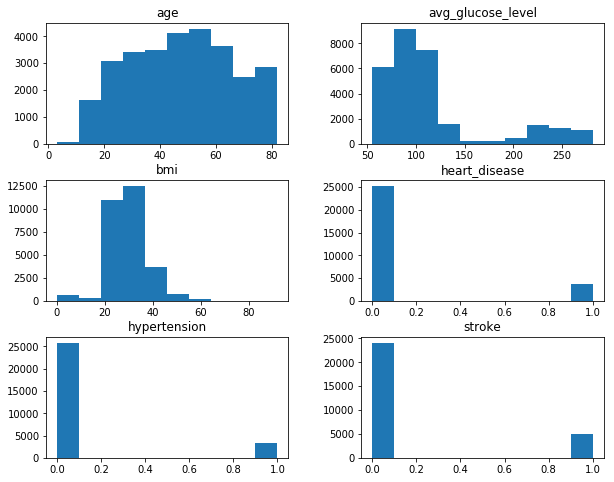

In [11]:
df.hist(figsize=(10,8), grid=False)
plt.show()

#### BOXPLOT on the data (Outlier Detection)

age                     AxesSubplot(0.125,0.657941;0.227941x0.222059)
hypertension         AxesSubplot(0.398529,0.657941;0.227941x0.222059)
heart_disease        AxesSubplot(0.672059,0.657941;0.227941x0.222059)
avg_glucose_level       AxesSubplot(0.125,0.391471;0.227941x0.222059)
bmi                  AxesSubplot(0.398529,0.391471;0.227941x0.222059)
stroke               AxesSubplot(0.672059,0.391471;0.227941x0.222059)
dtype: object

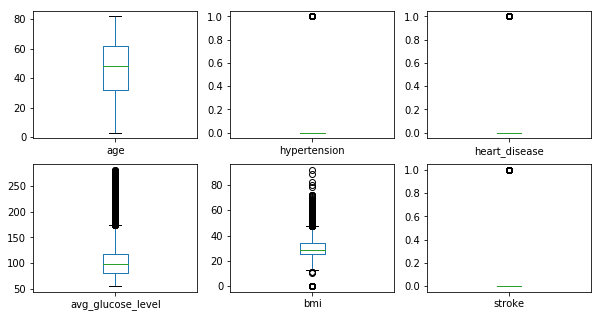

In [12]:
df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,8))

#### Correlation Matrix of Variables using HeatMap

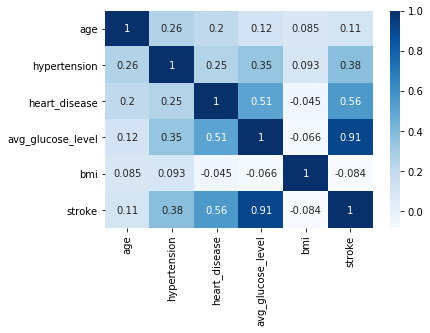

In [13]:
corr = df[df.columns].corr()
sns.heatmap(corr, annot = True,cmap='Blues')

#### Featues

In [14]:
#Create dataframes for X and Y variables
x = df.drop(["stroke"], axis=1)
y = df[['stroke']]


In [15]:
##Convert x to dummy variables
x=pd.get_dummies(x,drop_first = True)

In [16]:
##Train test split
from sklearn.model_selection import train_test_split
seed = 7
np.random.seed(seed)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = 123)

#### Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc=StandardScaler()

In [19]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


#### Classifier Invoking

In [22]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)


C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [28]:
from sklearn.naive_bayes import BernoulliNB

optimal_alpha = 1
NB_optimal = BernoulliNB(alpha=optimal_alpha)

# fitting the model
NB_optimal.fit(X_train, y_train)

C:\Users\Shyam Sundar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1, binarize=0.0, class_prior=None, fit_prior=True)

In [29]:
x.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'gender_Male', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

In [30]:
np.round(NB_optimal.coef_,2)

array([[-0.49, -0.98, -0.61, -0.  , -0.68, -0.85, -0.21, -6.54, -0.44,
        -1.57, -6.76, -0.67, -1.57, -0.4 ]])

In [31]:
pos_class_prob_sorted = NB_optimal.coef_.argsort()
pos_class_prob_sorted

array([[10,  7,  9, 12,  1,  5,  4, 11,  2,  0,  8, 13,  6,  3]],
      dtype=int64)

In [32]:
topn_class2 = sorted(zip(NB_optimal.feature_count_[1], x.columns),reverse=True)[:12]
topn_class2

[(3464.0, 'avg_glucose_level'),
 (2818.0, 'ever_married_Yes'),
 (2322.0, 'smoking_status_smokes'),
 (2242.0, 'work_type_Private'),
 (2122.0, 'age'),
 (1879.0, 'heart_disease'),
 (1777.0, 'Residence_type_Urban'),
 (1754.0, 'bmi'),
 (1481.0, 'gender_Male'),
 (1303.0, 'hypertension'),
 (722.0, 'smoking_status_never smoked'),
 (720.0, 'work_type_Self-employed')]

In [33]:
def important_features(x,classifier,n=10):
    class_labels = classifier.classes_
    feature_names =x.columns
    topn_class1 = sorted(zip(classifier.feature_count_[0], feature_names),reverse=True)[:n]
    topn_class2 = sorted(zip(classifier.feature_count_[1], feature_names),reverse=True)[:n]
    for coef, feat in topn_class2:
        print(class_labels[1], coef, feat) 

In [34]:
important_features(x, NB_optimal,n=10)

1 3464.0 avg_glucose_level
1 2818.0 ever_married_Yes
1 2322.0 smoking_status_smokes
1 2242.0 work_type_Private
1 2122.0 age
1 1879.0 heart_disease
1 1777.0 Residence_type_Urban
1 1754.0 bmi
1 1481.0 gender_Male
1 1303.0 hypertension


#### Evaluation Metrics

In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[6805,  389],
       [  21, 1507]], dtype=int64)

In [36]:
print(accuracy_score(y_test, y_pred))

0.9529924329282274


In [40]:
ypredB = NB_optimal.predict(X_test)

In [41]:
print(accuracy_score(y_test, ypredB))

0.9654895666131621


In [37]:
# store the predicted probabilities for class 1
y_pred_prob = classifier.predict_proba(X_test)[:, 1]
y_pred_prob[1:20]

array([2.24704212e-06, 5.34551376e-04, 5.28519504e-02, 1.00000000e+00,
       1.43306342e-06, 5.28776773e-06, 9.71550791e-03, 1.12655833e-05,
       3.28335250e-06, 6.92020683e-06, 1.02655212e-06, 1.39305747e-05,
       6.49855084e-05, 3.53559352e-06, 1.89035868e-05, 2.32864840e-04,
       4.88853611e-06, 2.59598949e-05, 4.21365132e-05])

Text(0,0.5,'Frequency')

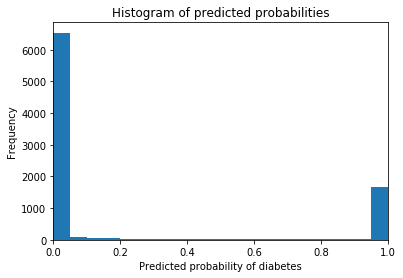

In [87]:
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=20)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

In [90]:
## Changing the cut off value for prediction
pred_proba_df = pd.DataFrame(classifier.predict_proba(X_test))
threshold_list = [0.05,0.1,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.6,0.7]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1))
    print('Our testing accuracy is {:.2f}'.format(test_accuracy))

    print(confusion_matrix(y_test.as_matrix().reshape(y_test.as_matrix().size,1),
                           y_test_pred.iloc[:,1].as_matrix().reshape(y_test_pred.iloc[:,1].as_matrix().size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.92
[[6525  669]
 [  12 1516]]

******** For i = 0.1 ******
Our testing accuracy is 0.93
[[6613  581]
 [  14 1514]]

******** For i = 0.2 ******
Our testing accuracy is 0.94
[[6712  482]
 [  18 1510]]

******** For i = 0.25 ******
Our testing accuracy is 0.95
[[6748  446]
 [  19 1509]]

******** For i = 0.3 ******
Our testing accuracy is 0.95
[[6782  412]
 [  19 1509]]

******** For i = 0.35 ******
Our testing accuracy is 0.95
[[6810  384]
 [  20 1508]]

******** For i = 0.4 ******
Our testing accuracy is 0.96
[[6830  364]
 [  21 1507]]

******** For i = 0.45 ******
Our testing accuracy is 0.96
[[6849  345]
 [  21 1507]]

******** For i = 0.5 ******
Our testing accuracy is 0.96
[[6869  325]
 [  21 1507]]

******** For i = 0.6 ******
Our testing accuracy is 0.96
[[6892  302]
 [  21 1507]]

******** For i = 0.7 ******
Our testing accuracy is 0.97
[[6921  273]
 [  22 1506]]
